In [2]:
%matplotlib inline

import os
import numpy as np
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Gradient descent

**Topic**:
* algo (basic machine learning)
* numpy
* matplotlib

**Goal**:
We have some data, we want to extrapolate

## extracting data

In [9]:
cat data.txt

12 0 13
12 8 18
10 0 14
10 4 16
8 0 14
8 2 15
8 8 8
6 0 13
6 3 11
4 0 8
4 4 4
2 2 2
0 0 0


In [1]:
data = np.loadtxt('data.txt', delimiter=' ')
data_len = np.shape(data)[0]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[:,0], data[:,1], data[:,2], c='r', marker='o')
plt.show()

NameError: name 'np' is not defined

We want to linearise
* first row: x
* second row: y
* third row: f(x,y)

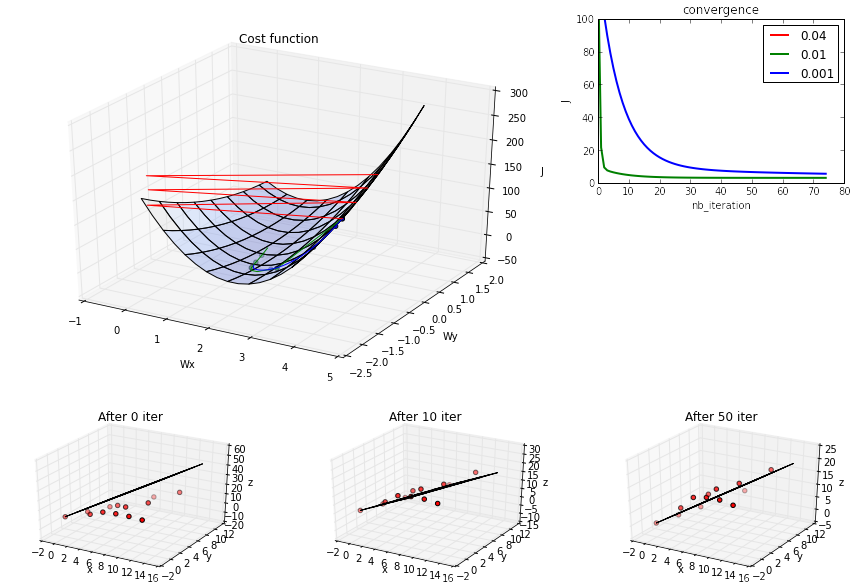

In [21]:

# cost_func
def J(Wx, Wy):
    return sum(1./ (2 * data_len)\
            * (Wx * data[:,0] + Wy * data[:,1] - data[:,2])**2)
v_J = np.vectorize(J)

# dJ/dWi
def dJdx(Wx, Wy):
    return 1./data_len\
            * sum((Wx * data[:,0] + Wy * data[:,1] - data[:,2]) * data[:,0])
def dJdy(Wx, Wy):
    return 1./data_len\
            * sum((Wx * data[:,0] + Wy * data[:,1] - data[:,2]) * data[:,1])

# gradient_descent
def batch_gradient_descent(Wlist, alpha):
    for i, j in ((i, j) for i in range(len(alpha)) for j in range(n_iter - 1)):
        a, b = Wlist[i][j][0:2]
#        temp = a
        a, b = a - alpha[i] * dJdx(a, b), b - alpha[i] * dJdy(a, b)
        Wlist[i, j + 1] = [a, b, J(a,b)]
    return Wlist

n_iter = 75
alpha = [0.03, 0.01, 0.001]
Wlist = np.empty((len(alpha), n_iter, 3))

weight_init = np.empty(3)
weight_init[0] = 4 * np.random.rand()
weight_init[1] = 4 * np.random.rand() - 2
weight_init[2] = J(weight_init[0], weight_init[1])

for i in range(len(alpha)):
    Wlist[i][0] = weight_init
Wlist = batch_gradient_descent(Wlist, alpha)

def fig_config(ax, title, x, y, z=None):
    ax.set_title(title)
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    if z is not None:
        ax.set_zlabel(z)

# set figure
fig = plt.figure(figsize=((15, 10)))

Wx = np.arange(0, 4, 0.25)
Wy = np.arange(-2, 2, 0.25)
Wx, Wy = np.meshgrid(Wx, Wy)
Z = np.zeros(np.shape(Wx))
Z = v_J(Wx, Wy)

ax1 = plt.subplot2grid((3,3), (0,0), colspan=2, rowspan=2, projection='3d')
fig_config(ax1, 'Cost function', 'Wx', 'Wy', 'J')
ax1.plot_surface(Wx, Wy, Z, rstride=2, cstride=2, cmap=cm.coolwarm, alpha=0.3)
for i, col in zip([1, 2], ['g','b']):
    x = [a for a, b in Wlist[i, :, 0:2]]
    y = [b for a, b in Wlist[i, :, 0:2]]
    ax1.plot(x , y, v_J(x, y), c=col) if i != 0\
            else ax1.plot(x[0:11] , y[0:11], v_J(x, y)[0:11], c=col)
    ax1.scatter([x[j] for j in (0, 1, 5, 10, 20)]\
            , [y[j] for j in (0, 1, 5, 10, 20)],\
            [v_J(x, y)[j] for j in (0, 1, 5, 10, 20)]\
            , c=col, marker='o')

x = [a for a, b in Wlist[0, :7, 0:2]]
y = [b for a, b in Wlist[0, :7, 0:2]]
ax1.plot(x , y, v_J(x, y), c='r') if i != 0\
        else ax1.plot(x[0:11] , y[0:11], v_J(x, y)[0:11], c='r')

ax2 = fig.add_subplot(3,3,3)
fig_config(ax2, 'convergence', 'nb_iteration', 'J')
ax2.set_ylim([0,100])
ax2.plot(Wlist[0, :, 2], c='r', linewidth=2, label='0.04')
ax2.plot(Wlist[1, :, 2], c='g', linewidth=2, label='0.01')
ax2.plot(Wlist[2, :, 2], c='b', linewidth=2, label='0.001')
ax2.legend(loc='upper right')

x = np.linspace(0, 14, 50)
y = np.linspace(0, 10, 50)
x, y = np.meshgrid(x, y)

def set_result(ax, nb_iter):
    fig_config(ax, 'After ' + str(nb_iter) + ' iter', 'x', 'y', 'z')
    ax.scatter(data[:,0], data[:,1], data[:,2], c='r', marker='o')
    z = Wlist[1][nb_iter][0] * x + Wlist[1][nb_iter][1] * y
    ax.plot_surface(x, y, z, alpha=0.4)

ax3 = fig.add_subplot(3,3,7, projection='3d')
set_result(ax3, 0)
ax4 = fig.add_subplot(3,3,8, projection='3d')
set_result(ax4, 10)
ax5 = fig.add_subplot(3,3,9, projection='3d')
set_result(ax5, 50)

# Display figure
plt.show()
